In [8]:
# importing Required libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib as plt

### Read the Data

In [10]:
df2 = pd.read_csv(r"/content/sample_data/SMSSpamCollection.zip",  sep='\t', skipinitialspace=True, header=None)

In [11]:
df2.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# renaming the columns Name
df2.columns = ['label', 'text']

In [13]:
df2.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Information of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
# checking the Duplicates
df2.duplicated().sum()

403

* I observed that i have 403 duplicates in my data
  set

In [16]:
# droping the duplicates from my DataSet
df2 = df2.drop_duplicates()

In [17]:
df2.duplicated().sum()

0

### Statistical Analysis on my DataSet

In [18]:
# Describing the DataSet
df2.describe()

,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [20]:
df2["label"].value_counts(normalize=True)

ham     0.87367
spam    0.12633
Name: label, dtype: float64

* Here, I have 87.36 percentage of Ham data points and 12.63 percentage of Spam Data points

In [21]:
mode =df2.mode()
mode

,label,text
0,ham,&lt;#&gt; am I think? Should say on syllabus
1,NaN,&lt;#&gt; great loxahatchee xmas tree burning...
2,NaN,&lt;#&gt; in mca. But not conform.
3,NaN,"&lt;#&gt; is fast approaching. So, Wish u a v..."
4,NaN,&lt;#&gt; mins but i had to stop somewhere fi...
...,...,...
5164,NaN,Ü thk of wat to eat tonight.
5165,NaN,Ü v ma fan...
5166,NaN,Ü wait 4 me in sch i finish ard 5..
5167,NaN,… and don‘t worry we‘ll have finished by march...


### Data Visualization

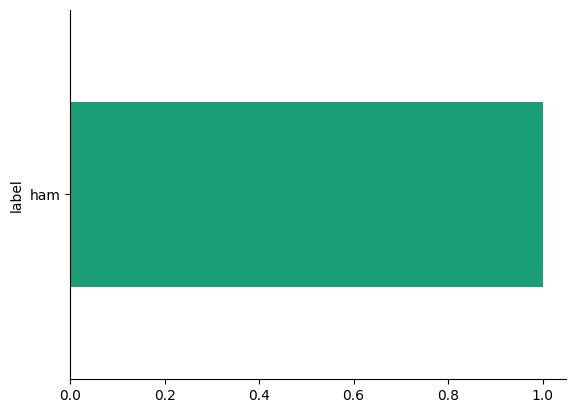

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
mode.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

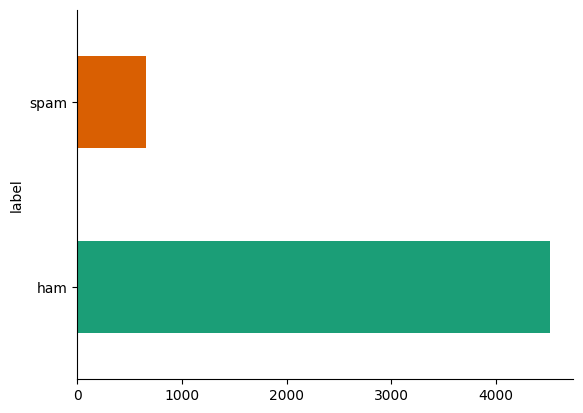

In [23]:
# Bar plot for the Label column
from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* *Here* i observed that, the most of the data points are "Ham" in my DataSet compared to "Spam"

In [25]:
# From my DataSet, I identify that my Input is Text colomn and my output is Label column
# Input
x = df2[["text"]]
# Output(Target column)
y = df2[["label"]]

In [26]:
x.shape, y.shape

((5169, 1), (5169, 1))

In [27]:
x.head()

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
y.head()

,label
0,ham
1,ham
2,spam
3,ham
4,ham


In [29]:
# Spliting Data the into train And Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4135, 1), (1034, 1), (4135, 1), (1034, 1))

In [31]:
x_train.head()

,text
2228,Oh k.k..where did you take test?
5529,What about this one then.
2149,I will once i get home
5058,Hey next sun 1030 there's a basic yoga course....
5051,I will vote for wherever my heart guides me


### Data Preparation  - Text Preprocessing

In [32]:
# Data Preproccessing for Train and Test Data
import re
import nltk
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [34]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
from tqdm import tqdm, tqdm_notebook

In [36]:
tqdm.pandas()


In [39]:
clean_x_train_lemma = x_train["text"].progress_apply(lambda x: preprocess(x, 'lemma'))
clean_x_train_lemma


100%|██████████| 4135/4135 [00:11<00:00, 363.70it/s]


,0,1
2228,oh k k take test,5
5529,one,1
2149,get home,2
5058,hey next sun basic yoga course bugis go pilate...,16
5051,vote wherever heart guide,4
...,...,...
4740,pizza u want,3
474,want get laid tonight want real dogging locati...,24
3266,want new nokia colour phone deliveredtomorrow ...,15
4016,receiving week triple echo ringtone shortly enjoy,7


In [46]:
clean_x_train_lemma.columns = ["Clean_text_lemm","text_lenth_lemma"]

In [47]:
clean_x_train_lemma

,Clean_text_lemm,text_lenth_lemma
2228,oh k k take test,5
5529,one,1
2149,get home,2
5058,hey next sun basic yoga course bugis go pilate...,16
5051,vote wherever heart guide,4
...,...,...
4740,pizza u want,3
474,want get laid tonight want real dogging locati...,24
3266,want new nokia colour phone deliveredtomorrow ...,15
4016,receiving week triple echo ringtone shortly enjoy,7


### Converting Text to Numerical vectors - BOW Representation
* Step 1 - Learn the vocabulary from the train data
* Step 2 - Transform the train['emails'] to X_train (i.e. DTM)
* Step 3 - Transform the test['emails'] to X_test (i.e. DTM)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()

In [52]:
x_train_num = vocab.fit_transform(clean_x_train_lemma["Clean_text_lemm"])

In [53]:
x_train_num

<4135x6218 sparse matrix of type '<class 'numpy.int64'>'
	with 32795 stored elements in Compressed Sparse Row format>

In [55]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(x_train_num))

print("Shape of input data:", x_train_num.shape)

Total unique words: 6218
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (4135, 6218)


In [64]:
print(x_train_num.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
from sys import getsizeof

print(type(x_train_num))
print(getsizeof(x_train_num), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes


In [68]:
print(type(x_train_num.toarray()))
print(getsizeof(x_train_num.toarray()), "Bytes")

<class 'numpy.ndarray'>
205691568 Bytes


### Preprocessing the Test Data

In [71]:
clean_x_test_lemma = x_test["text"].progress_apply(lambda x: preprocess(x, 'lemma'))
clean_x_test_lemma.head()

100%|██████████| 1034/1034 [00:08<00:00, 119.58it/s]


,0,1
1617,k make sense btw carlos difficult guy gonna sm...,15
2064,urgent mobile bonus caller prize nd attempt re...,14
1272,still havent collected dough pls let know go p...,13
3020,wat time u wan meet later,6
3642,stop club tone replying stop mix see tone com ...,22


In [70]:
clean_x_test_lemma.shape

(1034, 2)

In [75]:
clean_x_test_lemma.columns =["clean_text_lemma", "text_length_lemma"]
clean_x_test_lemma.head()

,clean_text_lemma,text_length_lemma
1617,k make sense btw carlos difficult guy gonna sm...,15
2064,urgent mobile bonus caller prize nd attempt re...,14
1272,still havent collected dough pls let know go p...,13
3020,wat time u wan meet later,6
3642,stop club tone replying stop mix see tone com ...,22


In [77]:
X_test_num = vocab.transform(clean_x_test_lemma['clean_text_lemma'])
X_test_num


<1034x6218 sparse matrix of type '<class 'numpy.int64'>'
	with 7558 stored elements in Compressed Sparse Row format>

## Building a Model

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_num, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [90]:
y_test_pred = model.predict(X_test_num)

In [96]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.97678916827853
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       894
        spam       0.98      0.85      0.91       140

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_num, y_train)

DecisionTreeClassifier()

In [100]:
y_test_prediction = classifier.predict(X_test_num)

In [101]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_prediction))
print(classification_report(y_test, y_test_prediction))

0.9671179883945842
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       894
        spam       0.90      0.85      0.88       140

    accuracy                           0.97      1034
   macro avg       0.94      0.92      0.93      1034
weighted avg       0.97      0.97      0.97      1034



### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
classifier_1 = RandomForestClassifier()
classifier_1.fit(x_train_num, y_train)

<ipython-input-102-d99547b34f6a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_1.fit(x_train_num, y_train)


RandomForestClassifier()

In [103]:
y_test_prediction_1 = classifier_1.predict(X_test_num)

In [105]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_prediction_1))
print(classification_report(y_test, y_test_prediction_1))

0.9748549323017408
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       894
        spam       1.00      0.81      0.90       140

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



In [115]:
df=pd.DataFrame({"Actual_Data":y_test["label"], "predicted_Data":y_test_pred})
df.head()

,Actual_Data,predicted_Data
1617,ham,ham
2064,spam,spam
1272,ham,ham
3020,ham,ham
3642,spam,spam
